In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np
from enmspring.spring import Spring
from enmspring.k_b0_util import get_df_by_filter_bp
from enmspring.hb_util import HBAgent, HBSixPlot, HBTwoBarPlots, HBAgentBigTraj

In [2]:
abbr_hosts = {'a_tract_21mer': 'A-tract', 'ctct_21mer': 'CTCT', 'gcgc_21mer': 'CpG',
              'g_tract_21mer': 'G-tract', 'atat_21mer': 'ATAT', 'tgtg_21mer': 'TGTG',
              'tat_21mer': 'A-junction'}

### Part 1: Single plot for Big 5000ns Window

In [27]:
host = 'tat_21mer'
n_bp = 21
time_label = '0_5000'

rootfolder = '/home/ytcdata/bigtraj_fluctmatch/5000ns'
h_agent = HBAgent(host, rootfolder, n_bp, time_label)
h_agent.initialize_basepair()

/home/ytcdata/bigtraj_fluctmatch/5000ns/tat_21mer/bdna+bdna/0_5000/pd_dfs exists
/home/ytcdata/bigtraj_fluctmatch/5000ns/tat_21mer/bdna+bdna/0_5000/pd_dfs exists


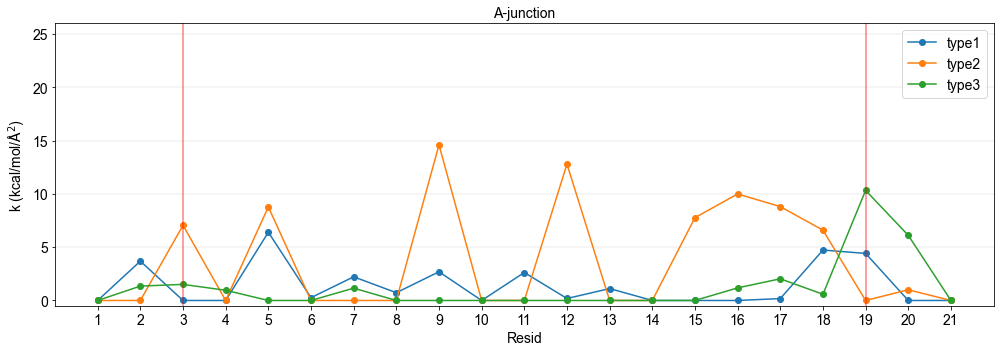

In [28]:
xticks = range(1, 22)
ylim = (-0.5, 26)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,5))

typename = 'type1'
resids, klist = h_agent.get_resid_klist_all(typename)
ax.plot(resids, klist, '-o', label=typename)

typename = 'type2'
resids, klist = h_agent.get_resid_klist_all(typename)
ax.plot(resids, klist, '-o', label=typename)

typename = 'type3'
resids, klist = h_agent.get_resid_klist_all(typename)
ax.plot(resids, klist, '-o', label=typename)

ax.set_title(abbr_hosts[host], fontsize=14)
ax.legend(fontsize=14)
ax.set_xticks(xticks)
ax.axvline(3, color='red', alpha=0.5)
ax.axvline(19, color='red', alpha=0.5)

for yvalue in range(5,26,5):
    ax.axhline(yvalue, color='grey', alpha=0.1)
ax.tick_params(axis='both', labelsize=14)
ax.set_xlabel('Resid', fontsize=14)
ax.set_ylabel('k (kcal/mol/Å$^2$)', fontsize=14)
ax.set_ylim(ylim)

plt.tight_layout()
#plt.savefig(f'/home/yizaochen/Desktop/drawzone_temp/{host}_hb.svg')
plt.show()

### Part 2: Split-5

In [27]:
host = 'tat_21mer'
bigtraj_folder = '/home/ytcdata/bigtraj_fluctmatch/split_5'
n_bp = 21
only_central = False
split_5 = True
one_big_window = False

h_agent = HBAgentBigTraj(host, bigtraj_folder, n_bp, only_central, split_5, one_big_window)
h_agent.initialize_basepair()

/home/ytcdata/bigtraj_fluctmatch/split_5/tat_21mer/bdna+bdna/0_1/pd_dfs exists
/home/ytcdata/bigtraj_fluctmatch/split_5/tat_21mer/bdna+bdna/1_2/pd_dfs exists
/home/ytcdata/bigtraj_fluctmatch/split_5/tat_21mer/bdna+bdna/2_3/pd_dfs exists
/home/ytcdata/bigtraj_fluctmatch/split_5/tat_21mer/bdna+bdna/3_4/pd_dfs exists
/home/ytcdata/bigtraj_fluctmatch/split_5/tat_21mer/bdna+bdna/4_5/pd_dfs exists
Read /home/ytcdata/bigtraj_fluctmatch/split_5/tat_21mer/bdna+bdna/0_1/pd_dfs/pairtypes_k_b0_cutoff_4.70.csv into df_all_k
Read /home/ytcdata/bigtraj_fluctmatch/split_5/tat_21mer/bdna+bdna/1_2/pd_dfs/pairtypes_k_b0_cutoff_4.70.csv into df_all_k
Read /home/ytcdata/bigtraj_fluctmatch/split_5/tat_21mer/bdna+bdna/2_3/pd_dfs/pairtypes_k_b0_cutoff_4.70.csv into df_all_k
Read /home/ytcdata/bigtraj_fluctmatch/split_5/tat_21mer/bdna+bdna/3_4/pd_dfs/pairtypes_k_b0_cutoff_4.70.csv into df_all_k
Read /home/ytcdata/bigtraj_fluctmatch/split_5/tat_21mer/bdna+bdna/4_5/pd_dfs/pairtypes_k_b0_cutoff_4.70.csv into df_a

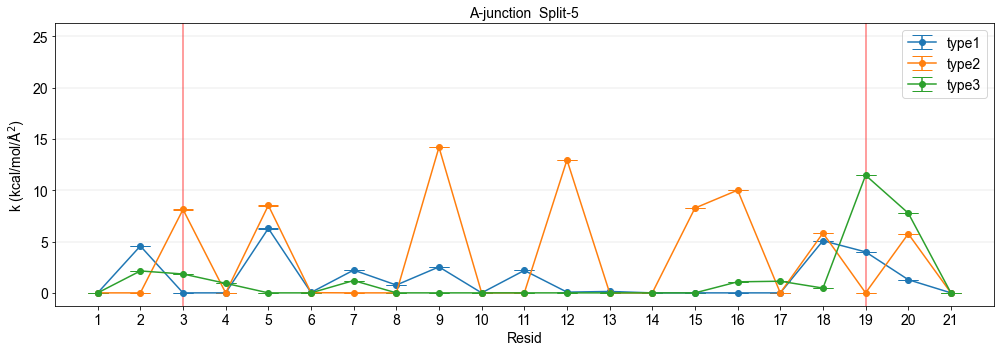

In [28]:
xticks = range(1, 22)
ylim = (-0.5, 26)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,5))

typename = 'type1'
resids, kmean, kstd = h_agent.get_resid_klist_all(typename)
ax.errorbar(resids, kmean, yerr=kstd, marker='o', capsize=10, label=typename)

typename = 'type2'
resids, kmean, kstd = h_agent.get_resid_klist_all(typename)
ax.errorbar(resids, kmean, yerr=kstd, marker='o', capsize=10, label=typename)

typename = 'type3'
resids, kmean, kstd = h_agent.get_resid_klist_all(typename)
ax.errorbar(resids, kmean, yerr=kstd, marker='o', capsize=10, label=typename)

title = f'{abbr_hosts[host]}  Split-5'
ax.set_title(title, fontsize=14)
ax.legend(fontsize=14)
ax.set_xticks(xticks)
ax.axvline(3, color='red', alpha=0.5)
ax.axvline(19, color='red', alpha=0.5)

for yvalue in range(5,26,5):
    ax.axhline(yvalue, color='grey', alpha=0.1)

ax.tick_params(axis='both', labelsize=14)
ax.set_xlabel('Resid', fontsize=14)
ax.set_ylabel('k (kcal/mol/Å$^2$)', fontsize=14)
#ax.set_ylim(ylim)

plt.tight_layout()
#plt.savefig(f'/home/yizaochen/Desktop/drawzone_temp/{host}_split5_hb.svg')
plt.show()

### Part 3: Moving Window, Window Size: 1000ns

In [21]:
host = 'a_tract_21mer'
bigtraj_folder = '/home/ytcdata/bigtraj_fluctmatch'
n_bp = 21
only_central = False
split_5 = False
one_big_window = False
interval_time = 250

h_agent = HBAgentBigTraj(host, bigtraj_folder, n_bp, only_central, split_5, one_big_window, interval_time)
h_agent.initialize_basepair()
k_container = h_agent.get_k_container()

/home/ytcdata/bigtraj_fluctmatch/250ns/a_tract_21mer/bdna+bdna/0_250/pd_dfs exists
/home/ytcdata/bigtraj_fluctmatch/250ns/a_tract_21mer/bdna+bdna/125_375/pd_dfs exists
/home/ytcdata/bigtraj_fluctmatch/250ns/a_tract_21mer/bdna+bdna/250_500/pd_dfs exists
/home/ytcdata/bigtraj_fluctmatch/250ns/a_tract_21mer/bdna+bdna/375_625/pd_dfs exists
/home/ytcdata/bigtraj_fluctmatch/250ns/a_tract_21mer/bdna+bdna/500_750/pd_dfs exists
/home/ytcdata/bigtraj_fluctmatch/250ns/a_tract_21mer/bdna+bdna/625_875/pd_dfs exists
/home/ytcdata/bigtraj_fluctmatch/250ns/a_tract_21mer/bdna+bdna/750_1000/pd_dfs exists
/home/ytcdata/bigtraj_fluctmatch/250ns/a_tract_21mer/bdna+bdna/875_1125/pd_dfs exists
/home/ytcdata/bigtraj_fluctmatch/250ns/a_tract_21mer/bdna+bdna/1000_1250/pd_dfs exists
/home/ytcdata/bigtraj_fluctmatch/250ns/a_tract_21mer/bdna+bdna/1125_1375/pd_dfs exists
/home/ytcdata/bigtraj_fluctmatch/250ns/a_tract_21mer/bdna+bdna/1250_1500/pd_dfs exists
/home/ytcdata/bigtraj_fluctmatch/250ns/a_tract_21mer/bdna+b

In [22]:
resid_list = list(range(1, n_bp+1))
typelist = ['type1', 'type2', 'type3']
n_window = 39 # 9, 19, 39
n_points = len(resid_list) * len(typelist)

data_type1 = np.zeros((n_window, len(resid_list)))
data_type2 = np.zeros((n_window, len(resid_list)))
data_type3 = np.zeros((n_window, len(resid_list)))
datalist = [data_type1, data_type2, data_type3]

for typename, data_type in zip(typelist, datalist):
    col_id = 0
    for resid in resid_list:
        data_type[:, col_id] = k_container[resid][typename]
        col_id += 1

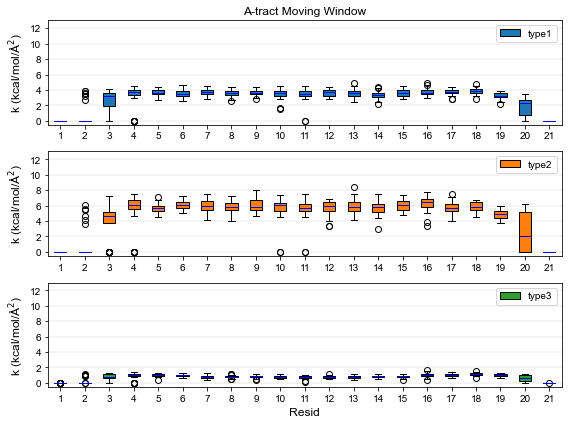

In [23]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8,6), sharey=True)
ylim = (-0.5, 13)
yticks = range(0,13,2)

ax = axes[0]
c = 'tab:blue'
ax.boxplot(data_type1, patch_artist=True, boxprops=dict(facecolor=c, color='black'), medianprops=dict(color='blue'))
title = f'{abbr_hosts[host]} Moving Window'
ax.set_title(title)
legend_elements = [Patch(facecolor=c, edgecolor='black', label='type1')]
ax.legend(handles=legend_elements, loc='upper right')
ax.set_ylabel('k (kcal/mol/Å$^2$)', fontsize=12)
for yvalue in range(0,14,2):
    ax.axhline(yvalue, color='grey', alpha=0.1)
ax.set_ylim(ylim)
ax.set_yticks(yticks)

ax = axes[1]
c = 'tab:orange'
ax.boxplot(data_type2, patch_artist=True, boxprops=dict(facecolor=c, color='black'), medianprops=dict(color='blue'))
legend_elements = [Patch(facecolor=c, edgecolor='black', label='type2')]
ax.legend(handles=legend_elements, loc='upper right')
ax.set_ylabel('k (kcal/mol/Å$^2$)', fontsize=12)
for yvalue in range(0,14,2):
    ax.axhline(yvalue, color='grey', alpha=0.1)
ax.set_ylim(ylim)

ax = axes[2]
c = 'tab:green'
ax.boxplot(data_type3, patch_artist=True, boxprops=dict(facecolor=c, color='black'), medianprops=dict(color='blue'))
legend_elements = [Patch(facecolor=c, edgecolor='black', label='type3')]
ax.legend(handles=legend_elements, loc='upper right')
ax.set_ylabel('k (kcal/mol/Å$^2$)', fontsize=12)
for yvalue in range(0,14,2):
    ax.axhline(yvalue, color='grey', alpha=0.1)
ax.set_ylim(ylim)
ax.set_xlabel('Resid', fontsize=12)

plt.tight_layout()
#plt.savefig(f'/home/yizaochen/Desktop/drawzone_temp/{host}_hb_moving_window_250ns.svg')
plt.show()

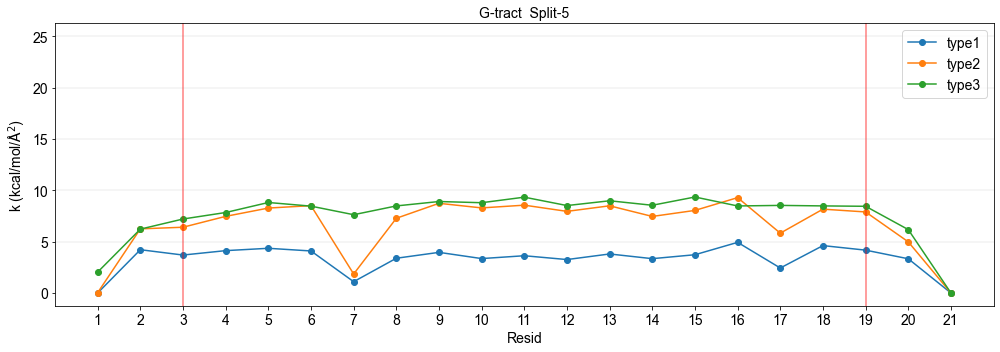

In [11]:
xticks = range(1, 22)
ylim = (-0.5, 26)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,5))
resids = range(1,22)
sele_frame = 0

typename = 'type1'
klist = [k_container[resid][typename][sele_frame] for resid in resids]
ax.plot(resids, klist, '-o', label=typename)

typename = 'type2'
klist = [k_container[resid][typename][sele_frame] for resid in resids]
ax.plot(resids, klist, '-o', label=typename)

typename = 'type3'
klist = [k_container[resid][typename][sele_frame] for resid in resids]
ax.plot(resids, klist, '-o', label=typename)
title = f'{abbr_hosts[host]}  Split-5'
ax.set_title(title, fontsize=14)
ax.legend(fontsize=14)
ax.set_xticks(xticks)
ax.axvline(3, color='red', alpha=0.5)
ax.axvline(19, color='red', alpha=0.5)

for yvalue in range(5,26,5):
    ax.axhline(yvalue, color='grey', alpha=0.1)

ax.tick_params(axis='both', labelsize=14)
ax.set_xlabel('Resid', fontsize=14)
ax.set_ylabel('k (kcal/mol/Å$^2$)', fontsize=14)
#ax.set_ylim(ylim)

plt.tight_layout()
#plt.savefig(f'/home/yizaochen/Desktop/drawzone_temp/{host}_split5_hb.svg')
plt.show()